In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import scipy.integrate as integrate


!pip3 install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 7.6 MB/s eta 0:00:00


In [24]:
# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
passengerId = test['PassengerId']

titanic_df = train.append(test, ignore_index = True)
titanic_df

<ipython-input-22-c5be8c8621f4>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  titanic_df = train.append(test, ignore_index = True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
train_index = len(train)
len(train)

In [ ]:
train_index = len(train)
test_index = len(titanic_df) - len(test)

In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [ ]:
titanic_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [ ]:
titanic_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [ ]:
train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Criando o df onde iremos processar os modelos de ML

df = pd.DataFrame()

In [ ]:
titanic_df['Survived'].nunique()

2

In [ ]:
titanic_df['Survived'].unique()

array([ 0.,  1., nan])

In [ ]:
titanic_df['Survived'].isnull().sum()

418

In [ ]:
titanic_df['Survived'].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

Gráfico abaixo representativo

<Axes: xlabel='Survived', ylabel='count'>

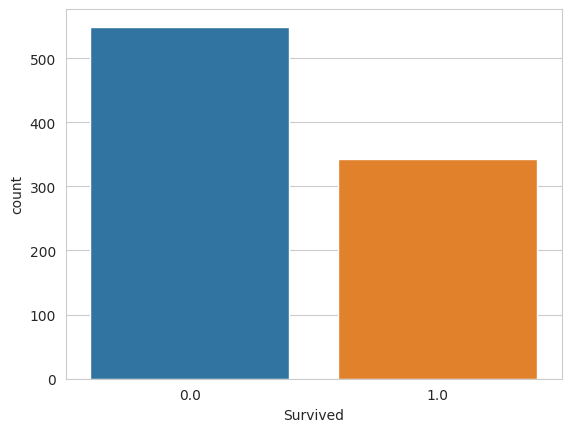

In [ ]:
sns.countplot(data = titanic_df, x = 'Survived')

Quantidade de valores únicos: 2

Quais são os valores únicos: [ 0.  1. nan]

Quantidade de valores nulos: 418

Quantidade por opção: 
0.0    549
1.0    342
Name: Survived, dtype: int64


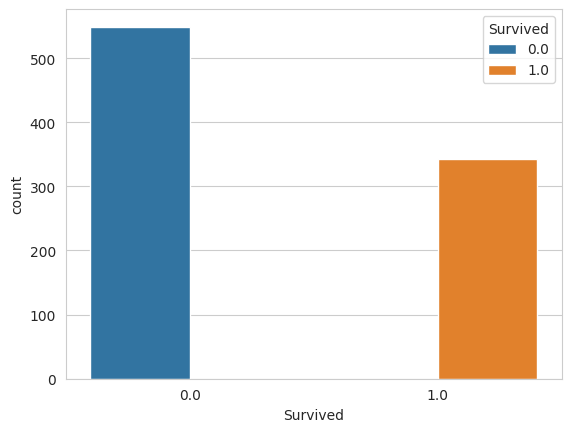

In [ ]:
# Criando uma função para ajudar no momento de visualizar as informações de cada coluna

def titanic_func(data, column, count = True):
    print(f'Quantidade de valores únicos: {data[column].nunique()}')
    print(f'\nQuais são os valores únicos: {data[column].unique()}')
    print(f'\nQuantidade de valores nulos: {data[column].isnull().sum()}')
    print(f'\nQuantidade por opção: \n{data[column].value_counts()}')

    if count == True:
        sns.countplot(data = data, x = column, hue = 'Survived')
    else:
        sns.displot(data[column], kde = True)


titanic_func(titanic_df, 'Survived')

In [ ]:
df['Survived'] = titanic_df['Survived']
df.drop(columns="Survived1")
df

,Survived1,Survived,Pclass,Sex
0,0.0,0.0,3,0
1,1.0,1.0,1,1
2,1.0,1.0,3,1
3,1.0,1.0,1,1
4,0.0,0.0,3,0
...,...,...,...,...
1304,NaN,NaN,3,0
1305,NaN,NaN,1,1
1306,NaN,NaN,3,0
1307,NaN,NaN,3,0


In [ ]:
df

,Survived1,Survived,Pclass,Sex
0,0.0,0.0,3,0
1,1.0,1.0,1,1
2,1.0,1.0,3,1
3,1.0,1.0,1,1
4,0.0,0.0,3,0
...,...,...,...,...
1304,NaN,NaN,3,0
1305,NaN,NaN,1,1
1306,NaN,NaN,3,0
1307,NaN,NaN,3,0


Quantidade de valores únicos: 3

Quais são os valores únicos: [3 1 2]

Quantidade de valores nulos: 0

Quantidade por opção: 
3    709
1    323
2    277
Name: Pclass, dtype: int64


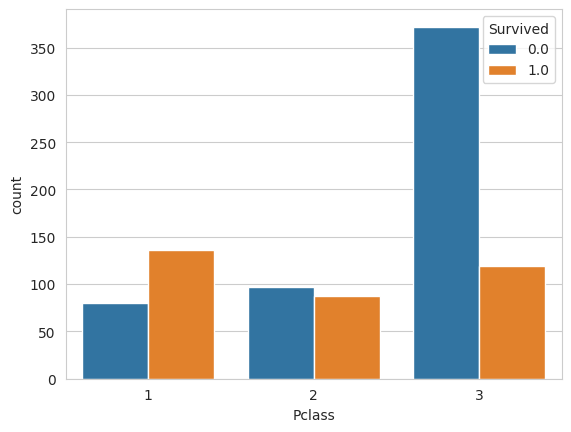

In [ ]:
titanic_func(titanic_df, 'Pclass')

In [ ]:
df['Pclass'] = titanic_df['Pclass']
df

,Survived1,Survived,Pclass
0,0.0,0.0,3
1,1.0,1.0,1
2,1.0,1.0,3
3,1.0,1.0,1
4,0.0,0.0,3
...,...,...,...
1304,NaN,NaN,3
1305,NaN,NaN,1
1306,NaN,NaN,3
1307,NaN,NaN,3


In [ ]:
df.drop(columns=['Survived1'])

,Survived,Pclass
0,0.0,3
1,1.0,1
2,1.0,3
3,1.0,1
4,0.0,3
...,...,...
1304,NaN,3
1305,NaN,1
1306,NaN,3
1307,NaN,3


In [ ]:
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [ ]:
#titanic_df['Sex'].map({'female':1, 'male': 0})
titanic_df['Sex'] = titanic_df['Sex'].replace(['male', 'female'], [0, 1])

Quantidade de valores únicos: 2

Quais são os valores únicos: ['male' 'female']

Quantidade de valores nulos: 0

Quantidade por opção: 
male      843
female    466
Name: Sex, dtype: int64


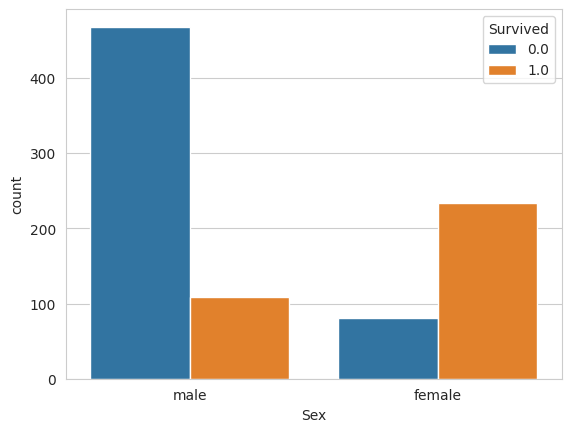

In [ ]:
titanic_func(titanic_df, 'Sex')

In [ ]:
df['Sex'] = titanic_df['Sex']
df

,Survived1,Survived,Pclass,Sex
0,0.0,0.0,3,0
1,1.0,1.0,1,1
2,1.0,1.0,3,1
3,1.0,1.0,1,1
4,0.0,0.0,3,0
...,...,...,...,...
1304,NaN,NaN,3,0
1305,NaN,NaN,1,1
1306,NaN,NaN,3,0
1307,NaN,NaN,3,0


In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


Quantidade de valores únicos: 98

Quais são os valores únicos: [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.   22.5  18.5  67.   76.   26.5  60.5  11.5
  0.33  0.17 38.5 ]

Quantidade de valores nulos: 263

Quantidade por opção: 
24.0    47
22.0    43
21.0    41
30.0    40
18.0    39
        ..
23.5     1
70.5     1
55.5     1
20.5     1
38.5     1
Name: Age, Length: 98, dtype: int64


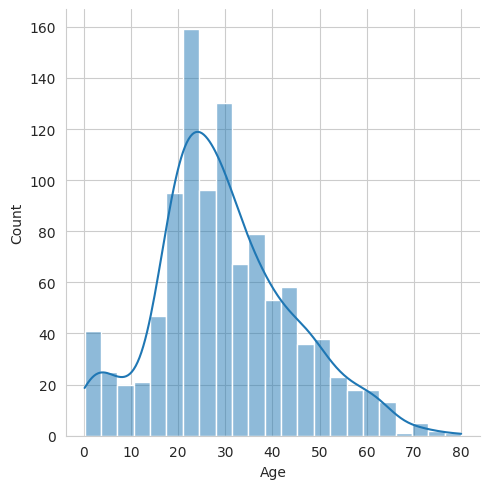

In [ ]:
titanic_func(titanic_df, 'Age', False)

In [ ]:
titanic_df['Age'].mean()

29.881137667304014

In [ ]:
titanic_df.corr()

<ipython-input-91-6b0fd17af2c0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic_df.corr()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,-0.013406,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.124617,-0.408106,0.060832,0.018322,-0.558629
Sex,-0.013406,0.543351,-0.124617,1.000000,-0.063645,0.109609,0.213125,0.185523
Age,0.028814,-0.077221,-0.408106,-0.063645,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,0.109609,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,0.213125,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.185523,0.178740,0.160238,0.221539,1.000000


Media de idade da 1º,2º e 3º classe

In [ ]:
titanic_df[titanic_df['Pclass'] == 1]['Age'].mean()

39.15992957746479

In [ ]:
titanic_df[titanic_df['Pclass'] == 2]['Age'].mean()

29.506704980842912

In [ ]:
titanic_df[titanic_df['Pclass'] == 3]['Age'].mean()

24.81636726546906

In [ ]:
for i in sorted(titanic_df['Pclass'].unique()):
  print(f'Pessoas da {i}ª classe tem a media de idade de: {titanic_df[titanic_df["Pclass"] == i]["Age"].mean():.2f}')

Pessoas da 1ª classe tem a media de idade de: 39.16
Pessoas da 2ª classe tem a media de idade de: 29.51
Pessoas da 3ª classe tem a media de idade de: 24.82


In [ ]:
titanic_df["Age"].isnull().sum()

263

In [ ]:
titanic_df['Age'][4]

35.0

O loop for abaixo itera sobre os índices do DataFrame titanic_df, e a cada iteração, é verificado se o valor da coluna 'Age' é nulo para a linha correspondente (pd.isnull(titanic_df['Age'][i])). Se o valor for nulo, o código verifica a classe (titanic_df['Pclass'][i]) e substitui o valor nulo pela média de idade da classe correspondente. O valor médio da idade é obtido utilizando a função mean() aplicada ao DataFrame filtrado pelo valor da classe (titanic_df[titanic_df['Pclass'] == 1]['Age'].mean()).

In [ ]:
count = 0
for i in titanic_df.index:

    if pd.isnull(titanic_df['Age'][i]):

        if titanic_df['Pclass'][i] == 1:
            titanic_df['Age'][i] = round(titanic_df[titanic_df['Pclass'] == 1]['Age'].mean(), 0)

        elif titanic_df['Pclass'][i] == 2:
            titanic_df['Age'][i] = round(titanic_df[titanic_df['Pclass'] == 2]['Age'].mean(), 0)

        elif titanic_df['Pclass'][i] == 3:
            titanic_df['Age'][i] = round(titanic_df[titanic_df['Pclass'] == 3]['Age'].mean(), 0)

    else:
        continue

In [ ]:
titanic_df[titanic_df['Pclass'] == 1]['Age'].isnull().sum()

0

In [ ]:
titanic_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [ ]:
df['Age'] = titanic_df['Age']

In [ ]:
df


,Survived1,Survived,Pclass,Sex,Age
0,0.0,0.0,3,0,22.0
1,1.0,1.0,1,1,38.0
2,1.0,1.0,3,1,26.0
3,1.0,1.0,1,1,35.0
4,0.0,0.0,3,0,35.0
...,...,...,...,...,...
1304,NaN,NaN,3,0,25.0
1305,NaN,NaN,1,1,39.0
1306,NaN,NaN,3,0,38.5
1307,NaN,NaN,3,0,25.0


Quantidade de valores únicos: 7

Quais são os valores únicos: [1 0 3 4 2 5 8]

Quantidade de valores nulos: 0

Quantidade por opção: 
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64


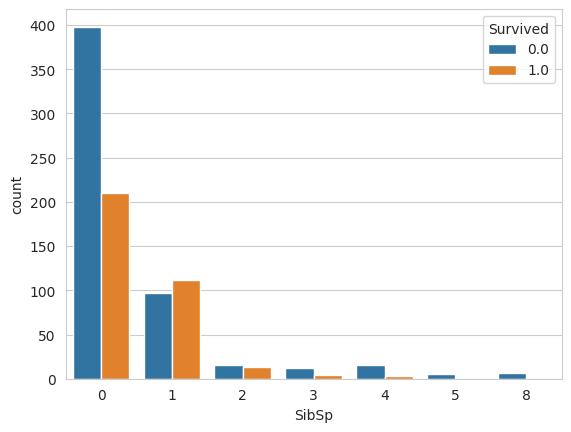

In [ ]:
titanic_func(titanic_df, 'SibSp')

In [ ]:
df['SibSp'] = titanic_df['SibSp']
df

,Survived1,Survived,Pclass,Sex,Age,SibSp
0,0.0,0.0,3,0,22.0,1
1,1.0,1.0,1,1,38.0,1
2,1.0,1.0,3,1,26.0,0
3,1.0,1.0,1,1,35.0,1
4,0.0,0.0,3,0,35.0,0
...,...,...,...,...,...,...
1304,NaN,NaN,3,0,25.0,0
1305,NaN,NaN,1,1,39.0,0
1306,NaN,NaN,3,0,38.5,0
1307,NaN,NaN,3,0,25.0,0


In [ ]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",0,25.0,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",0,25.0,0,0,359309,8.0500,NaN,S


Quantidade de valores únicos: 8

Quais são os valores únicos: [0 1 2 5 3 4 6 9]

Quantidade de valores nulos: 0

Quantidade por opção: 
0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: Parch, dtype: int64


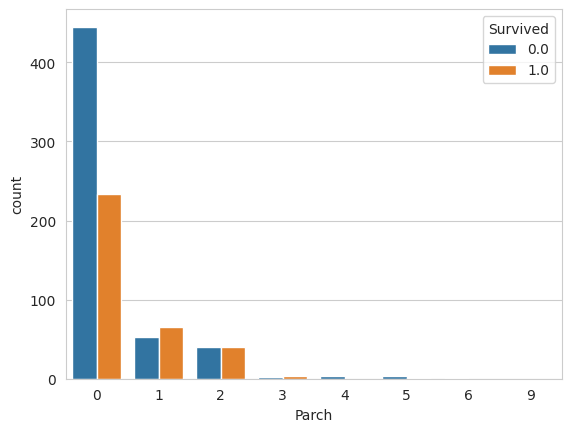

In [ ]:
titanic_func(titanic_df, 'Parch')

In [ ]:
df['Parch'] = titanic_df['Parch']
df

,Survived1,Survived,Pclass,Sex,Age,SibSp,Parch
0,0.0,0.0,3,0,22.0,1,0
1,1.0,1.0,1,1,38.0,1,0
2,1.0,1.0,3,1,26.0,0,0
3,1.0,1.0,1,1,35.0,1,0
4,0.0,0.0,3,0,35.0,0,0
...,...,...,...,...,...,...,...
1304,NaN,NaN,3,0,25.0,0,0
1305,NaN,NaN,1,1,39.0,0,0
1306,NaN,NaN,3,0,38.5,0,0
1307,NaN,NaN,3,0,25.0,0,0


FamilySize

In [ ]:
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1

In [ ]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1


In [ ]:
df['FamilySize'] = titanic_df['FamilySize']
df

,Survived1,Survived,Pclass,Sex,Age,SibSp,Parch,FamilySize
0,0.0,0.0,3,0,22.0,1,0,2
1,1.0,1.0,1,1,38.0,1,0,2
2,1.0,1.0,3,1,26.0,0,0,1
3,1.0,1.0,1,1,35.0,1,0,2
4,0.0,0.0,3,0,35.0,0,0,1
...,...,...,...,...,...,...,...,...
1304,NaN,NaN,3,0,25.0,0,0,1
1305,NaN,NaN,1,1,39.0,0,0,1
1306,NaN,NaN,3,0,38.5,0,0,1
1307,NaN,NaN,3,0,25.0,0,0,1


Quantidade de valores únicos: 281

Quais são os valores únicos: [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8
  39.6875   7.8     76.7292  61.9792  27.75    46.9     80.      83.475
  27.9     15.2458   8.1583   8.6625  73.5     14.4542  56.4958   7.65
  29.      12.475    9.       9.5      7.7875  47.1     15.85    34.375
  61.175   20.575   34.6542  63.3583  23.      77.2875   8.6542   7.775
  24.15     9.825   14.4583 247.5208   7.1417  22.3583   6.975    7.05
  14.5     15.0458  26.2833   9.2167  79.2      6.75    11.5     36.75
   7.7958  12.525   66.6      7.3125  61.3792   7.7333  69.55    16.1
  15.75    20.525   55.      25.925   33.5     30.6958  25.4667  28.7125
   0.      1

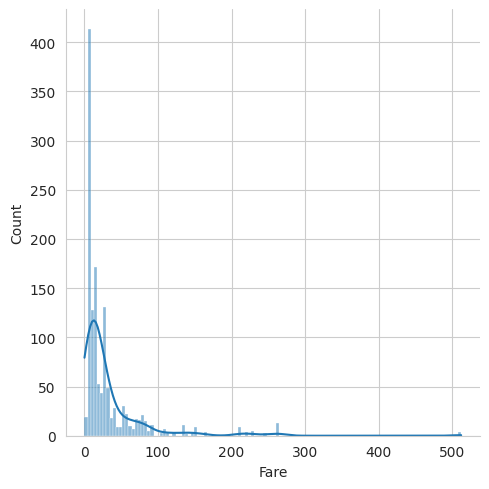

In [ ]:
titanic_func(titanic_df, 'Fare', False)

In [ ]:
titanic_df[titanic_df['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
1043,1044,NaN,3,"Storey, Mr. Thomas",0,60.5,0,0,3701,NaN,NaN,S,1


In [ ]:
titanic_df[titanic_df['Pclass'] == 3]['Fare'].mean()

13.302888700564973


O método fillna() é uma função de pandas que permite preencher valores ausentes (NaN) em um DataFrame ou em uma série com valores especificados.

In [ ]:
titanic_df['Fare'].fillna(titanic_df[titanic_df['Pclass'] == 3]['Fare'].mean(), inplace = True)

In [ ]:
titanic_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
FamilySize        0
dtype: int64

In [ ]:
df['Fare'] = titanic_df['Fare']
df

,Survived1,Survived,Pclass,Sex,Age,SibSp,Parch,FamilySize,Fare
0,0.0,0.0,3,0,22.0,1,0,2,7.2500
1,1.0,1.0,1,1,38.0,1,0,2,71.2833
2,1.0,1.0,3,1,26.0,0,0,1,7.9250
3,1.0,1.0,1,1,35.0,1,0,2,53.1000
4,0.0,0.0,3,0,35.0,0,0,1,8.0500
...,...,...,...,...,...,...,...,...,...
1304,NaN,NaN,3,0,25.0,0,0,1,8.0500
1305,NaN,NaN,1,1,39.0,0,0,1,108.9000
1306,NaN,NaN,3,0,38.5,0,0,1,7.2500
1307,NaN,NaN,3,0,25.0,0,0,1,8.0500


Cabin

In [ ]:
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2


In [ ]:
titanic_df['Cabin'].isnull().sum()

1014

In [ ]:
titanic_df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Embarked

Quantidade de valores únicos: 3

Quais são os valores únicos: ['S' 'C' 'Q' nan]

Quantidade de valores nulos: 2

Quantidade por opção: 
S    914
C    270
Q    123
Name: Embarked, dtype: int64


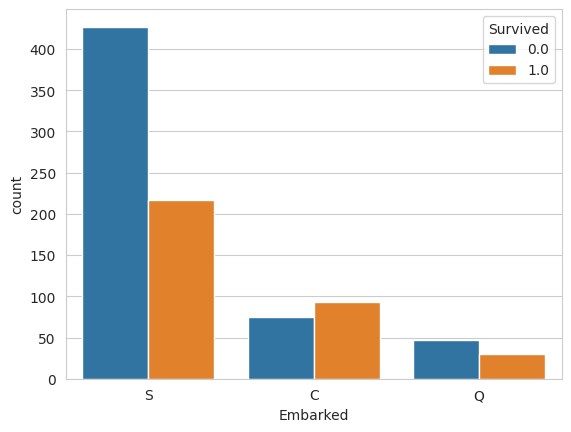

In [ ]:
titanic_func(titanic_df, 'Embarked')

portão S


In [ ]:
titanic_df[titanic_df['Embarked'] == 'S']['Survived'].mean()

0.33695652173913043

In [ ]:
titanic_df[titanic_df['Embarked'] == 'S']['Pclass'].mean()

2.3479212253829322

portão C

In [ ]:
titanic_df[titanic_df['Embarked'] == 'C']['Survived'].mean()

0.5535714285714286

In [ ]:
titanic_df[titanic_df['Embarked'] == 'C']['Pclass'].mean()

1.8518518518518519

portão Q

In [ ]:
titanic_df[titanic_df['Embarked'] == 'Q']['Survived'].mean()

0.38961038961038963

In [ ]:
titanic_df[titanic_df['Embarked'] == 'Q']['Pclass'].mean()

2.894308943089431

In [ ]:
titanic_df[titanic_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
61,62,1.0,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN,1
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN,1


In [ ]:
titanic_df['Embarked'].fillna("C", inplace = True)

In [ ]:
titanic_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
FamilySize        0
dtype: int64

In [ ]:
df['Embarked'] = titanic_df['Embarked']
df

,Survived1,Survived,Pclass,Sex,Age,SibSp,Parch,FamilySize,Fare,Embarked
0,0.0,0.0,3,0,22.0,1,0,2,7.2500,S
1,1.0,1.0,1,1,38.0,1,0,2,71.2833,C
2,1.0,1.0,3,1,26.0,0,0,1,7.9250,S
3,1.0,1.0,1,1,35.0,1,0,2,53.1000,S
4,0.0,0.0,3,0,35.0,0,0,1,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
1304,NaN,NaN,3,0,25.0,0,0,1,8.0500,S
1305,NaN,NaN,1,1,39.0,0,0,1,108.9000,C
1306,NaN,NaN,3,0,38.5,0,0,1,7.2500,S
1307,NaN,NaN,3,0,25.0,0,0,1,8.0500,S


In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1


**Name**

In [ ]:
titanic_df['Name']

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
                              ...                        
1304                                   Spector, Mr. Woolf
1305                         Oliva y Ocana, Dona. Fermina
1306                         Saether, Mr. Simon Sivertsen
1307                                  Ware, Mr. Frederick
1308                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [ ]:
#[titanic_df['Name'][n].split(',')[1].split('.')[0].strip() for n in titanic_df.index]
titanic_df['Title'] = titanic_df["Name"].apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [ ]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",0,25.0,0,0,A.5. 3236,8.0500,NaN,S,1,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,C,1,Dona
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",0,25.0,0,0,359309,8.0500,NaN,S,1,Mr


In [ ]:
titanic_df['Title'].nunique()

18

In [ ]:
titanic_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [ ]:
titanic_df['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64

In [ ]:
titanic_df['Title'] = [n if n in ['Mr', 'Miss', 'Mrs', 'Master'] else 'Person' for n in titanic_df['Title']]
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1,Mr


In [ ]:
titanic_df['Title'].isnull().sum()

0

In [ ]:
titanic_df['Title'].nunique()

5

In [ ]:
titanic_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Person'], dtype=object)

In [ ]:
df['Title'] = titanic_df['Title']
df

,Survived1,Survived,Pclass,Sex,Age,SibSp,Parch,FamilySize,Fare,Embarked,Title
0,0.0,0.0,3,0,22.0,1,0,2,7.2500,S,Mr
1,1.0,1.0,1,1,38.0,1,0,2,71.2833,C,Mrs
2,1.0,1.0,3,1,26.0,0,0,1,7.9250,S,Miss
3,1.0,1.0,1,1,35.0,1,0,2,53.1000,S,Mrs
4,0.0,0.0,3,0,35.0,0,0,1,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,NaN,3,0,25.0,0,0,1,8.0500,S,Mr
1305,NaN,NaN,1,1,39.0,0,0,1,108.9000,C,Person
1306,NaN,NaN,3,0,38.5,0,0,1,7.2500,S,Mr
1307,NaN,NaN,3,0,25.0,0,0,1,8.0500,S,Mr


Quantidade de valores únicos: 5

Quais são os valores únicos: ['Mr' 'Mrs' 'Miss' 'Master' 'Person']

Quantidade de valores nulos: 0

Quantidade por opção: 
Mr        757
Miss      260
Mrs       197
Master     61
Person     34
Name: Title, dtype: int64


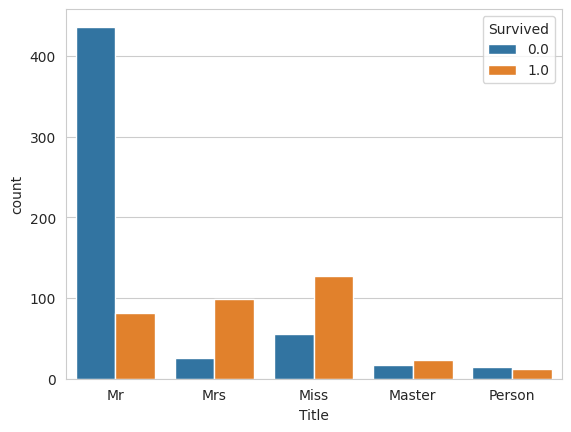

In [ ]:
titanic_func(titanic_df,'Title')

In [ ]:
pclass = pd.get_dummies(df['Pclass'], prefix = 'Pclass', drop_first = True)
title = pd.get_dummies(df['Title'], prefix = 'Title', drop_first = True)
embarked = pd.get_dummies(df['Embarked'], prefix = 'Embarked', drop_first = True)

In [ ]:
titanic_completo = pd.concat([df, pclass, title, embarked], axis = 1)

 o DataFrame resultante titanic_completo terá as colunas do DataFrame df juntamente com as colunas dummy geradas para as variáveis 'Pclass', 'Title' e 'Embarked'. Isso cria um DataFrame completo, onde todas as variáveis estão em formato numérico,

In [ ]:
titanic_completo.drop(['Pclass', 'Title', 'Embarked'], axis = 1, inplace = True)

O parâmetro inplace=True é utilizado para indicar que a operação deve ser realizada diretamente no DataFrame titanic_completo, ou seja, o DataFrame original será modificado.

In [ ]:
titanic_completo

,Survived1,Survived,Sex,Age,SibSp,Parch,FamilySize,Fare,Pclass_2,Pclass_3,Title_Miss,Title_Mr,Title_Mrs,Title_Person,Embarked_Q,Embarked_S
0,0.0,0.0,0,22.0,1,0,2,7.2500,0,1,0,1,0,0,0,1
1,1.0,1.0,1,38.0,1,0,2,71.2833,0,0,0,0,1,0,0,0
2,1.0,1.0,1,26.0,0,0,1,7.9250,0,1,1,0,0,0,0,1
3,1.0,1.0,1,35.0,1,0,2,53.1000,0,0,0,0,1,0,0,1
4,0.0,0.0,0,35.0,0,0,1,8.0500,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,NaN,0,25.0,0,0,1,8.0500,0,1,0,1,0,0,0,1
1305,NaN,NaN,1,39.0,0,0,1,108.9000,0,0,0,0,0,1,0,0
1306,NaN,NaN,0,38.5,0,0,1,7.2500,0,1,0,1,0,0,0,1
1307,NaN,NaN,0,25.0,0,0,1,8.0500,0,1,0,1,0,0,0,1


In [ ]:
train = titanic_completo[:train_index].copy()
test = titanic_completo[test_index:].copy()

In [ ]:
train

,Survived1,Survived,Sex,Age,SibSp,Parch,FamilySize,Fare,Pclass_2,Pclass_3,Title_Miss,Title_Mr,Title_Mrs,Title_Person,Embarked_Q,Embarked_S
0,0.0,0.0,0,22.0,1,0,2,7.2500,0,1,0,1,0,0,0,1
1,1.0,1.0,1,38.0,1,0,2,71.2833,0,0,0,0,1,0,0,0
2,1.0,1.0,1,26.0,0,0,1,7.9250,0,1,1,0,0,0,0,1
3,1.0,1.0,1,35.0,1,0,2,53.1000,0,0,0,0,1,0,0,1
4,0.0,0.0,0,35.0,0,0,1,8.0500,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,0.0,0,27.0,0,0,1,13.0000,1,0,0,0,0,1,0,1
887,1.0,1.0,1,19.0,0,0,1,30.0000,0,0,1,0,0,0,0,1
888,0.0,0.0,1,25.0,1,2,4,23.4500,0,1,1,0,0,0,0,1
889,1.0,1.0,0,26.0,0,0,1,30.0000,0,0,0,1,0,0,0,0


In [ ]:
train['Survived'] = train['Survived'].astype(int)

convertendo os valores da coluna 'Survived' do DataFrame train para o tipo de dados inteiro (int).

In [ ]:
X = train.drop(['Survived1', 'Survived'], axis = 1)
y = train['Survived']

criando o DataFrame X a partir do DataFrame train excluindo as colunas 'Survived1' e 'Survived'. Essas colunas estão sendo removidas ao longo do eixo das colunas (axis=1).

In [ ]:
X_test = test.drop(['Survived1', 'Survived'], axis = 1)

In [ ]:
def func_acuracia(algoritmo, X_train, y_train, vc):
    modelo = algoritmo.fit(X_train, y_train)
    acuracia = round(modelo.score(X_train, y_train) * 100, 2)

    train_pred = model_selection.cross_val_predict(algoritmo, X_train, y_train, cv = vc, n_jobs = -1)
    acuracia_vc = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)

    return acuracia, acuracia_vc

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
acc_rf, acc_vc_rf = func_acuracia(RandomForestClassifier(), X, y, 10)

print(f"Acurácia: {acc_rf}")
print(f"Acurácia Validação Cruzada: {acc_vc_rf}")

Acurácia: 98.2
Acurácia Validação Cruzada: 81.14


In [ ]:
acc_log, acc_vc_log = func_acuracia(LogisticRegression(max_iter=1000), X, y, 10)

print(f"Acurácia: {acc_log}")
print(f"Acurácia Validação Cruzada: {acc_vc_log}")

Acurácia: 82.94
Acurácia Validação Cruzada: 82.38


In [ ]:
acc_knn, acc_vc_knn = func_acuracia(KNeighborsClassifier(), X, y, 10)

print(f"Acurácia: {acc_knn}")
print(f"Acurácia Validação Cruzada: {acc_vc_knn}")

Acurácia: 80.58
Acurácia Validação Cruzada: 72.5


In [ ]:
acc_gaussian, acc_vc_gaussian = func_acuracia(GaussianNB(), X, y, 10)

print(f"Acurácia: {acc_gaussian}")
print(f"Acurácia Validação Cruzada: {acc_vc_gaussian}")

Acurácia: 78.79
Acurácia Validação Cruzada: 78.56


In [ ]:
acc_linear_svc, acc_vc_linear_svc = func_acuracia(LinearSVC(dual=False), X, y, 10)

print(f"Acurácia: {acc_linear_svc}")
print(f"Acurácia Validação Cruzada: {acc_vc_linear_svc}")

Acurácia: 83.28
Acurácia Validação Cruzada: 82.72


In [ ]:
acc_sgd, acc_vc_sgd = func_acuracia(SGDClassifier(), X, y, 10)

print(f"Acurácia: {acc_sgd}")
print(f"Acurácia Validação Cruzada: {acc_vc_sgd}")

Acurácia: 79.8
Acurácia Validação Cruzada: 69.47


In [ ]:
acc_dt, acc_vc_dt = func_acuracia(DecisionTreeClassifier(), X, y, 10)

print(f"Acurácia: {acc_dt}")
print(f"Acurácia Validação Cruzada: {acc_vc_dt}")

Acurácia: 98.32
Acurácia Validação Cruzada: 79.57


In [ ]:
acc_gbt, acc_vc_gbt = func_acuracia(GradientBoostingClassifier(), X, y, 10)

print(f"Acurácia: {acc_gbt}")
print(f"Acurácia Validação Cruzada: {acc_vc_gbt}")

Acurácia: 89.67
Acurácia Validação Cruzada: 83.05
